In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools

In [2]:
missing_val=  ['N/a', 'Na', np.nan]
df = pd.read_csv('lending_club_loan_two.csv', na_values= missing_val)

In [3]:
# Database column types
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [6]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


# Cleaning Data

## Null Calculations

In [7]:
# % null value in each column
round(df.isnull().sum() / df.shape[0] * 100.00,2)

loan_amnt               0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_title               5.79
emp_length              4.62
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
title                   0.44
dti                     0.00
earliest_cr_line        0.00
open_acc                0.00
pub_rec                 0.00
revol_bal               0.00
revol_util              0.07
total_acc               0.00
initial_list_status     0.00
application_type        0.00
mort_acc                9.54
pub_rec_bankruptcies    0.14
address                 0.00
dtype: float64

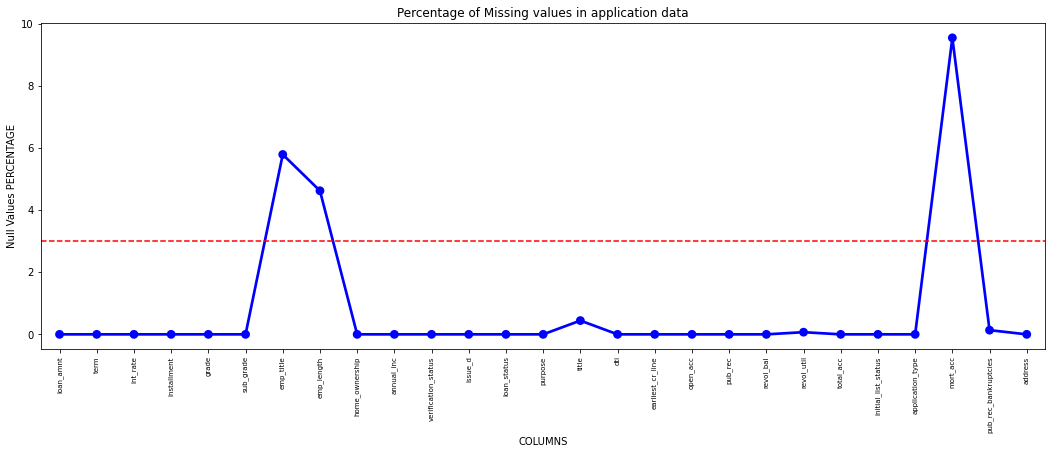

In [8]:
dfnul = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
dfnul.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=dfnul,color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(3, ls='--',color='red')
plt.title("Percentage of Missing values in application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

There are 3 columns that are >3% null

In [9]:
##shows the nulls that are >3%
nul3df = dfnul[dfnul["Null Values Percentage"]>=3]

In [10]:
nul3df

,Column Name,Null Values Percentage
6,emp_title,5.789208
7,emp_length,4.621115
24,mort_acc,9.543469


### Viewing Coerealations

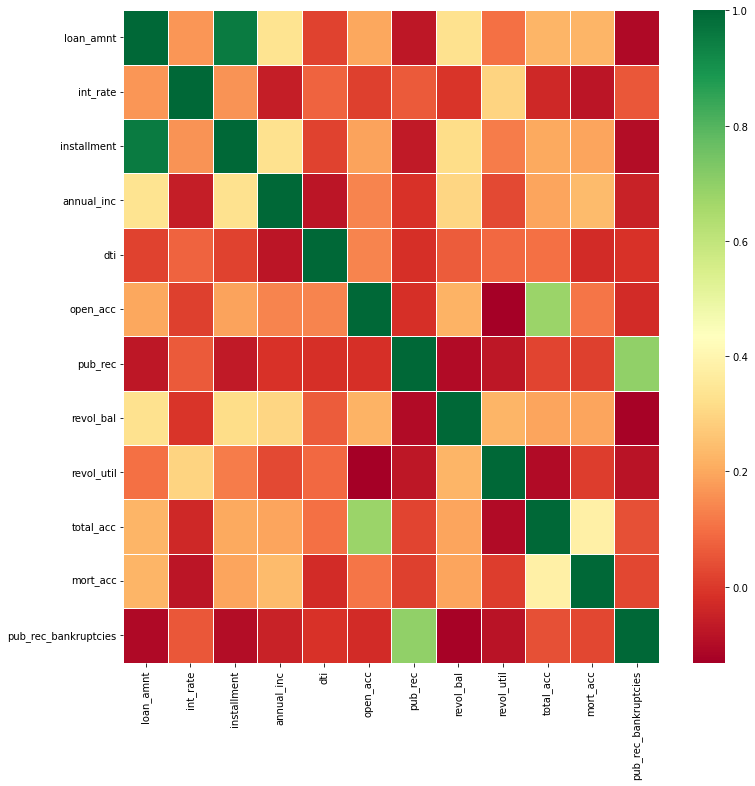

In [11]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(df.corr(), cmap="RdYlGn",annot=False,linewidth =1)

HIgh cor-
loan amount and instalment
open acc and tot acc
pub_rec and pub rec bankruptcies
tot account and moracc


### Checking for outliers to replace null with mean median or mode

<AxesSubplot:xlabel='loan_amnt'>

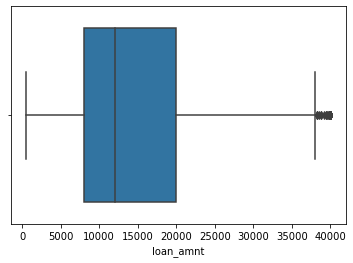

In [12]:
sns.boxplot(x=df["loan_amnt"])

<AxesSubplot:xlabel='total_acc'>

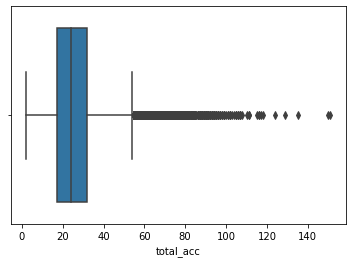

In [13]:
sns.boxplot(x=df["total_acc"])

<AxesSubplot:xlabel='open_acc'>

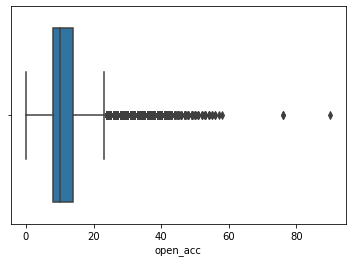

In [14]:
sns.boxplot(x=df["open_acc"])

<AxesSubplot:xlabel='mort_acc'>

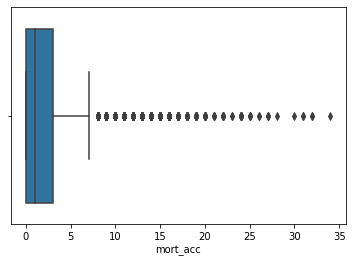

In [15]:
sns.boxplot(x=df["mort_acc"])

## Replacing nulls with Modes

In [16]:
df['mort_acc'].fillna(df['mort_acc'].mode()[0], inplace=True)

In [17]:
# % null value in each column
round(df.isnull().sum() / df.shape[0] * 100.00,2)

loan_amnt               0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_title               5.79
emp_length              4.62
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
title                   0.44
dti                     0.00
earliest_cr_line        0.00
open_acc                0.00
pub_rec                 0.00
revol_bal               0.00
revol_util              0.07
total_acc               0.00
initial_list_status     0.00
application_type        0.00
mort_acc                0.00
pub_rec_bankruptcies    0.14
address                 0.00
dtype: float64

In [18]:
df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].mode()[0], inplace=True)

In [19]:
# % null value in each column
round(df.isnull().sum() / df.shape[0] * 100.00,2)

loan_amnt               0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_title               5.79
emp_length              4.62
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
title                   0.44
dti                     0.00
earliest_cr_line        0.00
open_acc                0.00
pub_rec                 0.00
revol_bal               0.00
revol_util              0.07
total_acc               0.00
initial_list_status     0.00
application_type        0.00
mort_acc                0.00
pub_rec_bankruptcies    0.00
address                 0.00
dtype: float64

## Creating Bins

### Bins for loan_amnt

In [20]:
def Loanamtcat(row):
    if row.loan_amnt >= 30000:
        return '>=30K'
    elif row.loan_amnt <30000 and row.loan_amnt >= 20000:
        return '<30k - >=20k'
    elif row.loan_amnt <20000 and row.loan_amnt >= 10000:
        return '<20k - >=10k'
    elif row.loan_amnt <10000 and row.loan_amnt >= 5000:
        return '<10k - >=5k'
    elif row.loan_amnt <5000 and row.loan_amnt >= 1000:
        return '<5k - >=1k'
    else:
        return '<1k'

In [21]:
df['Loanamtcat'] = df.apply(Loanamtcat, axis='columns')

### Bins for Intrest Rate

In [22]:
def intratecat(row):
    if row.int_rate >= 30:
        return '>=30'
    elif row.int_rate <30 and row.int_rate >= 20:
        return '<30 - >=20'
    elif row.int_rate <20 and row.int_rate >= 10:
        return '<20 - >=10'
    elif row.int_rate <10 and row.int_rate >= 5:
        return '<10 - >=5'
    else:
        return '<5'

In [23]:
df['Intratecat'] = df.apply(intratecat, axis='columns')

### Bins for DTI

In [76]:
def dticat(row):
    if row.dti >= 50:
        return '>=50'
    elif row.dti <50 and row.dti >= 40:
        return '<50 - >=40'
    elif row.dti <40 and row.dti >= 30:
        return '<40 - >=30'
    elif row.dti <30 and row.dti >= 20:
        return '<30 - >=20'
    elif row.dti <20 and row.dti >= 10:
        return '<20 - >=10'
    elif row.dti <10 and row.dti >= 5:
        return '<10 - >=5'
    else:
        return '<5'

In [78]:
df['dticat'] = df.apply(dticat, axis='columns')

### Bins for Anual Income

In [24]:
def Anincomecat(row):
    if row.annual_inc >= 1000000:
        return '>=1M'
    elif row.annual_inc <1000000 and row.annual_inc >= 500000:
        return '<1M - >=500k'
    elif row.annual_inc <500000 and row.annual_inc >= 100000:
        return '<500k - >=100k'
    elif row.annual_inc <100000 and row.annual_inc >= 50000:
        return '<100k - >=50k'
    elif row.annual_inc <50000 and row.annual_inc >= 10000:
        return '<50k - >=10k'
    elif row.annual_inc <10000 and row.annual_inc >= 5000:
        return '<10k - >=5k'
    elif row.annual_inc <5000 and row.annual_inc >= 1000:
        return '<5k - >=1k'
    else:
        return '<1k'

In [25]:
df['Anincomecat'] = df.apply(Anincomecat, axis='columns')

### Bins for Open Account

In [26]:
def openacccat(row):
    if row.open_acc >= 80:
        return '>=80'
    elif row.open_acc <70 and row.open_acc >= 60:
        return '<70 - >=60'
    elif row.open_acc <60 and row.open_acc >= 50:
        return '<60 - >=50'
    elif row.open_acc <50 and row.open_acc >= 40:
        return '<50 - >=40'
    elif row.open_acc <40 and row.open_acc >= 30:
        return '<40 - >=30'
    elif row.open_acc <30 and row.open_acc >= 20:
        return '<30 - >=20'
    elif row.open_acc <20 and row.open_acc >= 10:
        return '<20 - >=10'
    else:
        return '<10'

In [27]:
df['openacccat'] = df.apply(openacccat, axis='columns')

### Bins for Revolving Ballance

In [28]:
def revobalcat(row):
    if row.revol_bal >= 1000000:
        return '>=1M'
    elif row.revol_bal <1000000 and row.revol_bal >= 500000:
        return '<1M - >=500k'
    elif row.revol_bal <500000 and row.revol_bal >= 100000:
        return '<500k - >=100k'
    elif row.revol_bal <100000 and row.revol_bal >= 50000:
        return '<100k - >=50k'
    elif row.revol_bal <50000 and row.revol_bal >= 10000:
        return '<50k - >=10k'
    elif row.revol_bal <10000 and row.revol_bal >= 5000:
        return '<10k - >=5k'
    elif row.revol_bal <5000 and row.revol_bal >= 1000:
        return '<5k - >=1k'
    else:
        return '<1k'

In [29]:
df['revobalcat'] = df.apply(revobalcat, axis='columns')

### Bins for Revolving Utilities?

In [30]:
def Revolvutilcat(row):
    if row.revol_util >= 500:
        return '>=500'
    elif row.revol_util <500 and row.revol_util >= 300:
        return '<500 - >=300'
    elif row.revol_util <300 and row.revol_util >= 100:
        return '<300 - >=100'
    elif row.revol_util <100 and row.revol_util >= 50:
        return '<100 - >=50'
    else:
        return '<50'

In [31]:
df['Revolvutilcat'] = df.apply(Revolvutilcat, axis='columns')

### Bins for Total Accounts

In [32]:
def Totalacccat(row):
    if row.total_acc >= 100:
        return '>=100'
    elif row.total_acc <100 and row.total_acc >= 50:
        return '<100 - >=50'
    elif row.total_acc <50 and row.total_acc >= 40:
        return '<50 - >=40'
    elif row.total_acc <40 and row.total_acc >= 30:
        return '<40 - >=30'
    elif row.total_acc <30 and row.total_acc >= 20:
        return '<30 - >=20'
    elif row.total_acc <20 and row.total_acc >= 10:
        return '<20 - >=10'
    else:
        return '<10'

In [33]:
df['Totalacccat'] = df.apply(Totalacccat, axis='columns')

### Bins for Mortage Accounts

In [34]:
def mortacccat(row):
    if row.mort_acc >= 30:
        return '>=30'
    elif row.mort_acc <30 and row.mort_acc >= 20:
        return '<30 - >=20'
    elif row.mort_acc <20 and row.mort_acc >= 10:
        return '<20 - >=10'
    elif row.mort_acc <10 and row.mort_acc >= 5:
        return '<10 - >=5'
    else:
        return '<5'

In [35]:
df['mortacccat'] = df.apply(mortacccat, axis='columns')

### Bins for Public Rec Bankruptcies 

In [36]:
def pubrecbankruptccat(row):
    if row.pub_rec_bankruptcies >= 5:
        return '>=5'
    elif row.pub_rec_bankruptcies <5 and row.pub_rec_bankruptcies >= 4:
        return '<5 - >=4'
    elif row.pub_rec_bankruptcies <4 and row.pub_rec_bankruptcies >= 3:
        return '<4 - >=3'
    elif row.pub_rec_bankruptcies <3 and row.pub_rec_bankruptcies >= 2:
        return '<3 - >=2'
    else:
        return '<2'

In [37]:
df['pubrecbankruptccat'] = df.apply(pubrecbankruptccat, axis='columns')

# Analysis

In [38]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,Loanamtcat,Intratecat,Anincomecat,openacccat,revobalcat,Revolvutilcat,Totalacccat,mortacccat,pubrecbankruptccat
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",<20k - >=10k,<20 - >=10,<500k - >=100k,<20 - >=10,<50k - >=10k,<50,<30 - >=20,<5,<2
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",<10k - >=5k,<20 - >=10,<100k - >=50k,<20 - >=10,<50k - >=10k,<100 - >=50,<30 - >=20,<5,<2
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",<20k - >=10k,<20 - >=10,<50k - >=10k,<20 - >=10,<50k - >=10k,<100 - >=50,<30 - >=20,<5,<2
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",<10k - >=5k,<10 - >=5,<100k - >=50k,<10,<10k - >=5k,<50,<20 - >=10,<5,<2
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",<30k - >=20k,<20 - >=10,<100k - >=50k,<20 - >=10,<50k - >=10k,<100 - >=50,<50 - >=40,<5,<2


### Loan Amount in %

In [39]:
df.Loanamtcat.value_counts(normalize=True)*100

<20k - >=10k    40.306037
<10k - >=5k     24.664041
<30k - >=20k    18.272858
<5k - >=1k       9.843194
>=30K            6.911345
<1k              0.002525
Name: Loanamtcat, dtype: float64

### Bankruptcies Amount in %

In [40]:
df.pubrecbankruptccat.value_counts(normalize=True)*100

<2          99.412923
<3 - >=2     0.466379
<4 - >=3     0.088630
<5 - >=4     0.020706
>=5          0.011363
Name: pubrecbankruptccat, dtype: float64

### Paid vs Charged Off

(array([0, 1]), [Text(0, 0, 'Fully Paid'), Text(1, 0, 'Charged Off')])

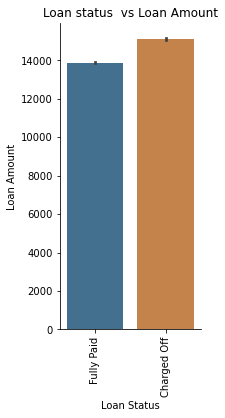

In [82]:
sns.catplot(x="loan_status", y="loan_amnt", 
                data=df, saturation=.5,
                kind="bar",aspect=.6)

plt.title('Loan status  vs Loan Amount')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.xticks(rotation=90)

### Home Ownership

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'RENT'),
  Text(1, 0, 'MORTGAGE'),
  Text(2, 0, 'OWN'),
  Text(3, 0, 'OTHER'),
  Text(4, 0, 'NONE'),
  Text(5, 0, 'ANY')])

<Figure size 1080x576 with 0 Axes>

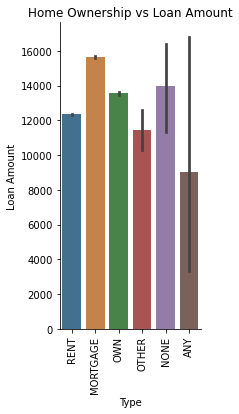

In [43]:
plt.figure(figsize=(15,8))
sns.catplot(x="home_ownership", y="loan_amnt", 
                data=df, saturation=.5,
                kind="bar",aspect=.6)

plt.title('Home Ownership vs Loan Amount')
plt.xlabel('Type')
plt.ylabel('Loan Amount')
plt.xticks(rotation=90)



(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'RENT'),
  Text(1, 0, 'MORTGAGE'),
  Text(2, 0, 'OWN'),
  Text(3, 0, 'OTHER'),
  Text(4, 0, 'NONE'),
  Text(5, 0, 'ANY')])

<Figure size 1080x576 with 0 Axes>

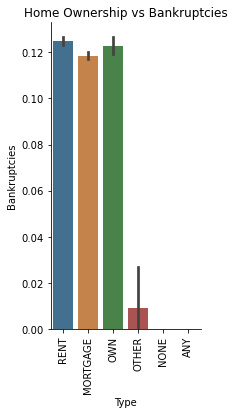

In [44]:
plt.figure(figsize=(15,8))
sns.catplot(x="home_ownership", y="pub_rec_bankruptcies", 
                data=df, saturation=.5,
                kind="bar",aspect=.6)

plt.title('Home Ownership vs Bankruptcies')
plt.xlabel('Type')
plt.ylabel('Bankruptcies')
plt.xticks(rotation=90)


### Anual Income

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '<500k - >=100k'),
  Text(1, 0, '<100k - >=50k'),
  Text(2, 0, '<50k - >=10k'),
  Text(3, 0, '<1M - >=500k'),
  Text(4, 0, '>=1M'),
  Text(5, 0, '<5k - >=1k'),
  Text(6, 0, '<10k - >=5k'),
  Text(7, 0, '<1k')])

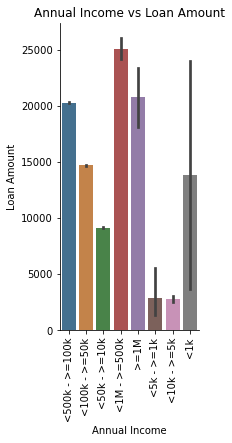

In [45]:
sns.catplot(x="Anincomecat", y="loan_amnt", 
                data=df, saturation=.5,
                kind="bar",aspect=.6)

plt.title('Annual Income vs Loan Amount')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '<500k - >=100k'),
  Text(1, 0, '<100k - >=50k'),
  Text(2, 0, '<50k - >=10k'),
  Text(3, 0, '<1M - >=500k'),
  Text(4, 0, '>=1M'),
  Text(5, 0, '<5k - >=1k'),
  Text(6, 0, '<10k - >=5k'),
  Text(7, 0, '<1k')])

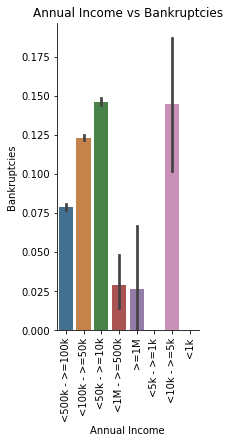

In [46]:
sns.catplot(x="Anincomecat", y="pub_rec_bankruptcies", 
                data=df, saturation=.5,
                kind="bar",aspect=.6)

plt.title('Annual Income vs Bankruptcies')
plt.xlabel('Annual Income')
plt.ylabel('Bankruptcies')

plt.xticks(rotation=90)

### Purpose for Takeing out Loans

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'vacation'),
  Text(1, 0, 'debt_consolidation'),
  Text(2, 0, 'credit_card'),
  Text(3, 0, 'home_improvement'),
  Text(4, 0, 'small_business'),
  Text(5, 0, 'major_purchase'),
  Text(6, 0, 'other'),
  Text(7, 0, 'medical'),
  Text(8, 0, 'wedding'),
  Text(9, 0, 'car'),
  Text(10, 0, 'moving'),
  Text(11, 0, 'house'),
  Text(12, 0, 'educational'),
  Text(13, 0, 'renewable_energy')])

<Figure size 1080x576 with 0 Axes>

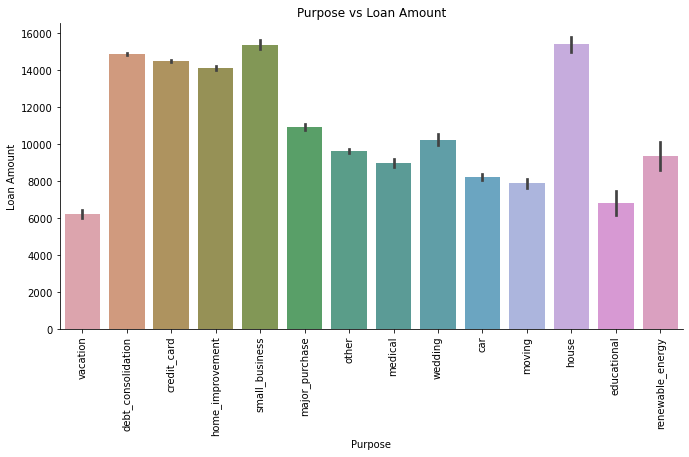

In [47]:

plt.figure(figsize=(15,8))
sns.catplot(x="purpose", y="loan_amnt", 
                data=df, saturation=.5,
                kind="bar",aspect=2)

plt.title('Purpose vs Loan Amount')
plt.xlabel('Purpose')
plt.ylabel('Loan Amount')

plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'vacation'),
  Text(1, 0, 'debt_consolidation'),
  Text(2, 0, 'credit_card'),
  Text(3, 0, 'home_improvement'),
  Text(4, 0, 'small_business'),
  Text(5, 0, 'major_purchase'),
  Text(6, 0, 'other'),
  Text(7, 0, 'medical'),
  Text(8, 0, 'wedding'),
  Text(9, 0, 'car'),
  Text(10, 0, 'moving'),
  Text(11, 0, 'house'),
  Text(12, 0, 'educational'),
  Text(13, 0, 'renewable_energy')])

<Figure size 1080x576 with 0 Axes>

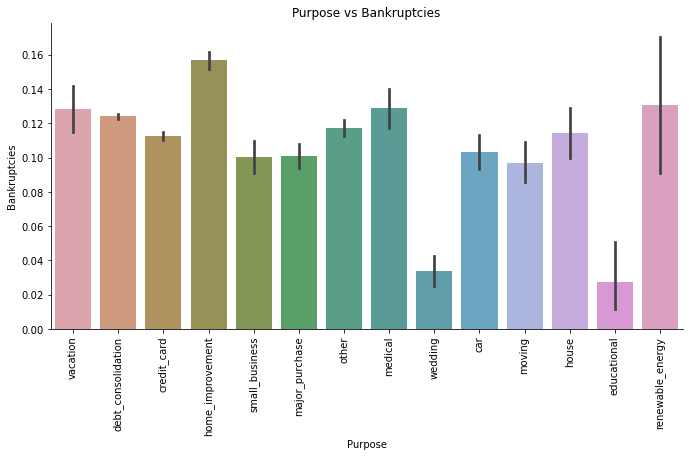

In [48]:
plt.figure(figsize=(15,8))
sns.catplot(x="purpose", y="pub_rec_bankruptcies", 
                data=df, saturation=.5,
                kind="bar",aspect=2)

plt.title('Purpose vs Bankruptcies')
plt.xlabel('Purpose')
plt.ylabel('Bankruptcies')
plt.xticks(rotation=90)

### Application Type 

Text(-9.075000000000003, 0.5, 'Loan Amount')

<Figure size 1080x576 with 0 Axes>

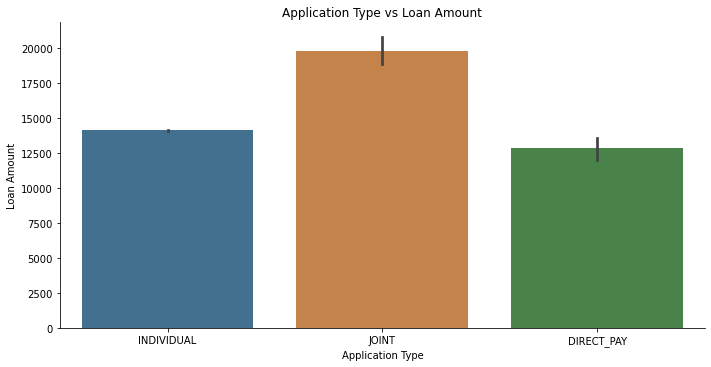

In [50]:
plt.figure(figsize=(15,8))
sns.catplot(x="application_type", y="loan_amnt", 
                data=df, saturation=.5,
                kind="bar",aspect=2)

plt.title('Application Type vs Loan Amount')
plt.xlabel('Application Type')
plt.ylabel('Loan Amount')


Text(0.42499999999999716, 0.5, 'Bankruptcies')

<Figure size 1080x576 with 0 Axes>

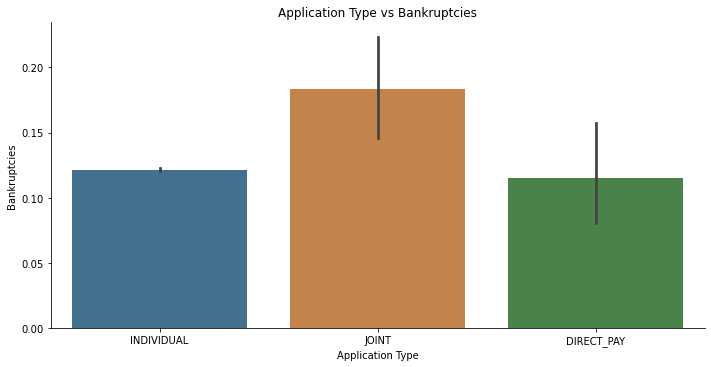

In [49]:
plt.figure(figsize=(15,8))
sns.catplot(x="application_type", y="pub_rec_bankruptcies", 
                data=df, saturation=.5,
                kind="bar",aspect=2)

plt.title('Application Type vs Bankruptcies')
plt.xlabel('Application Type')
plt.ylabel('Bankruptcies')


### Term Length

Text(-9.075000000000003, 0.5, 'Loan Amount')

<Figure size 1080x576 with 0 Axes>

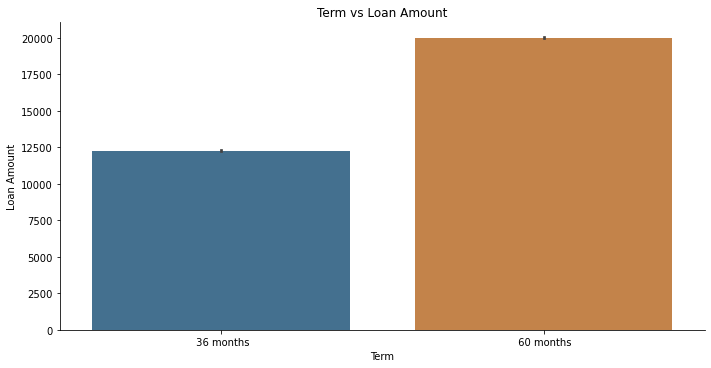

In [51]:
plt.figure(figsize=(15,8))
sns.catplot(x="term", y="loan_amnt", 
                data=df, saturation=.5,
                kind="bar",aspect=2)

plt.title('Term vs Loan Amount')
plt.xlabel('Term')
plt.ylabel('Loan Amount')


Text(0.42499999999999716, 0.5, 'Bankruptcies')

<Figure size 1080x576 with 0 Axes>

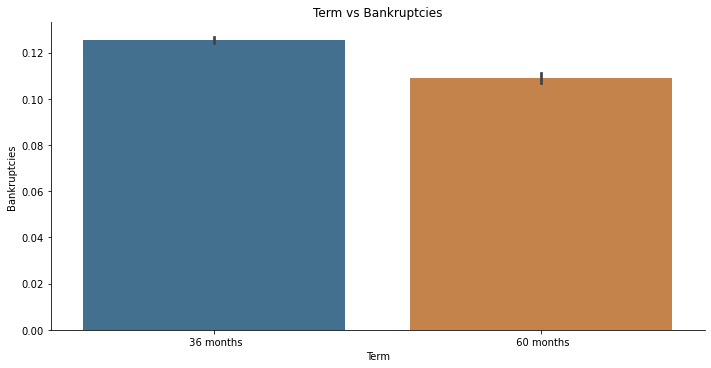

In [52]:
plt.figure(figsize=(15,8))
sns.catplot(x="term", y="pub_rec_bankruptcies", 
                data=df, saturation=.5,
                kind="bar",aspect=2)

plt.title('Term vs Bankruptcies')
plt.xlabel('Term')
plt.ylabel('Bankruptcies')


### Verification Status

Text(-9.075000000000003, 0.5, 'Loan Amount')

<Figure size 1080x576 with 0 Axes>

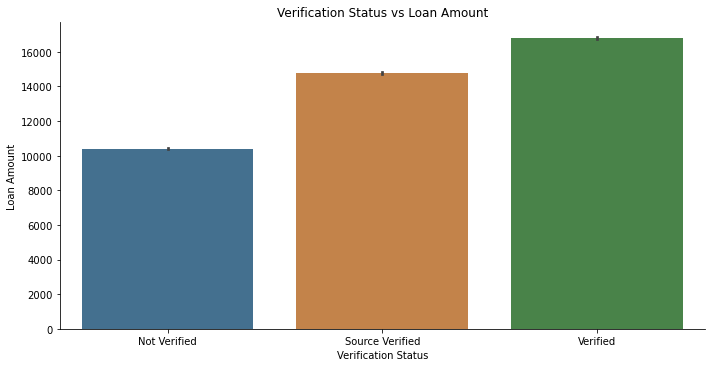

In [54]:
plt.figure(figsize=(15,8))
sns.catplot(x="verification_status", y="loan_amnt", 
                data=df, saturation=.5,
                kind="bar",aspect=2)

plt.title('Verification Status vs Loan Amount')
plt.xlabel('Verification Status')
plt.ylabel('Loan Amount')



Text(0.42499999999999716, 0.5, 'Bankruptcies')

<Figure size 1080x576 with 0 Axes>

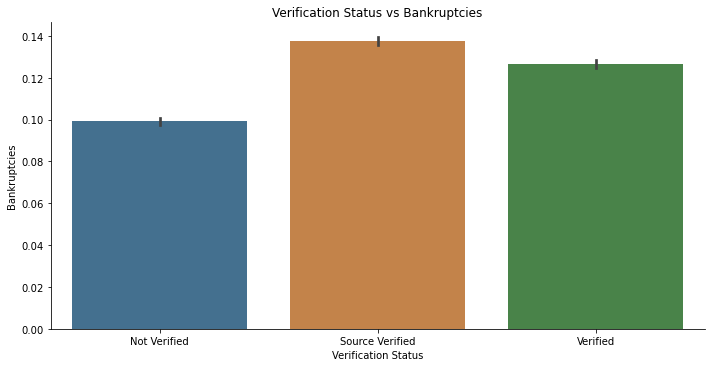

In [53]:
plt.figure(figsize=(15,8))
sns.catplot(x="verification_status", y="pub_rec_bankruptcies", 
                data=df, saturation=.5,
                kind="bar",aspect=2)


plt.title('Verification Status vs Bankruptcies')
plt.xlabel('Verification Status')
plt.ylabel('Bankruptcies')


### Employment Length

Text(-9.075000000000003, 0.5, 'Loan Amount')

<Figure size 1080x576 with 0 Axes>

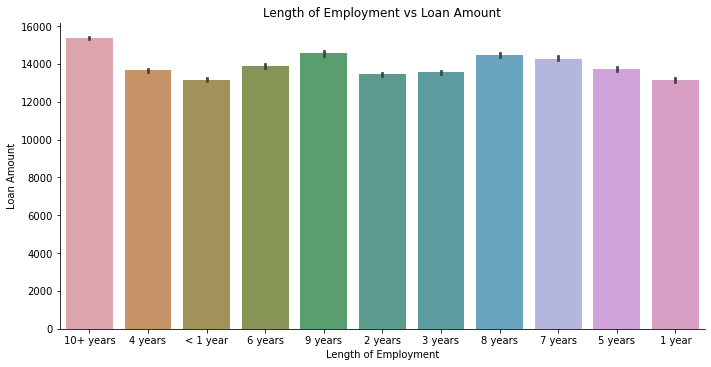

In [55]:
plt.figure(figsize=(15,8))
sns.catplot(x="emp_length", y="loan_amnt", 
                data=df, saturation=.5,
                kind="bar",aspect=2)

plt.title('Length of Employment vs Loan Amount')
plt.xlabel('Length of Employment')
plt.ylabel('Loan Amount')


Text(0.42499999999999716, 0.5, 'Bankruptcies')

<Figure size 1080x576 with 0 Axes>

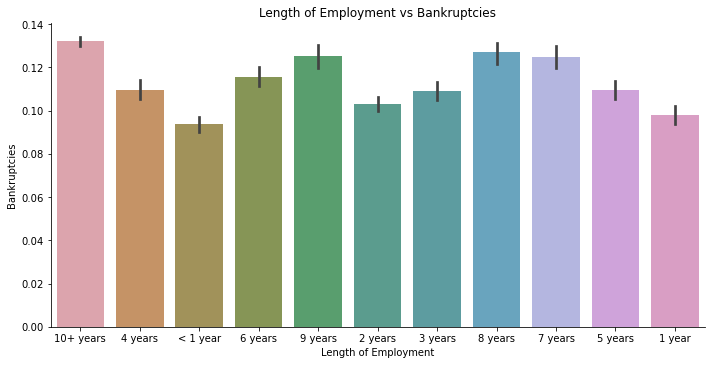

In [56]:
plt.figure(figsize=(15,8))
sns.catplot(x="emp_length", y="pub_rec_bankruptcies", 
                data=df, saturation=.5,
                kind="bar",aspect=2)


plt.title('Length of Employment vs Bankruptcies')
plt.xlabel('Length of Employment')
plt.ylabel('Bankruptcies')


###  Revolving Balance

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '<50k - >=10k'),
  Text(1, 0, '<10k - >=5k'),
  Text(2, 0, '<5k - >=1k'),
  Text(3, 0, '<100k - >=50k'),
  Text(4, 0, '<500k - >=100k'),
  Text(5, 0, '<1k'),
  Text(6, 0, '<1M - >=500k'),
  Text(7, 0, '>=1M')])

<Figure size 1080x576 with 0 Axes>

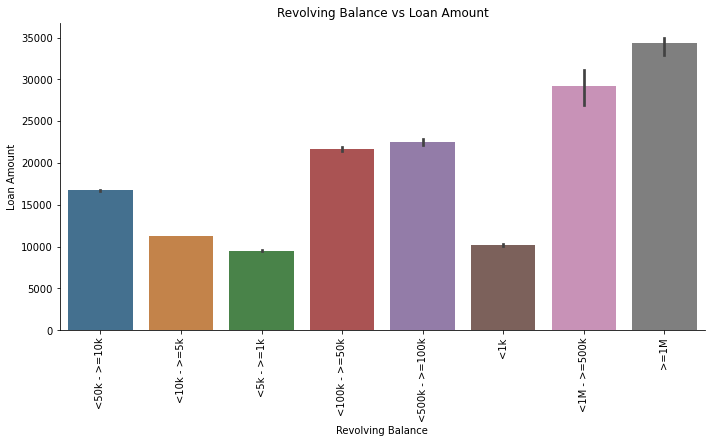

In [57]:
plt.figure(figsize=(15,8))
sns.catplot(x="revobalcat", y="loan_amnt", 
                data=df, saturation=.5,
                kind="bar",aspect=2)

plt.title('Revolving Balance vs Loan Amount')
plt.xlabel('Revolving Balance')
plt.ylabel('Loan Amount')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '<50k - >=10k'),
  Text(1, 0, '<10k - >=5k'),
  Text(2, 0, '<5k - >=1k'),
  Text(3, 0, '<100k - >=50k'),
  Text(4, 0, '<500k - >=100k'),
  Text(5, 0, '<1k'),
  Text(6, 0, '<1M - >=500k'),
  Text(7, 0, '>=1M')])

<Figure size 1080x576 with 0 Axes>

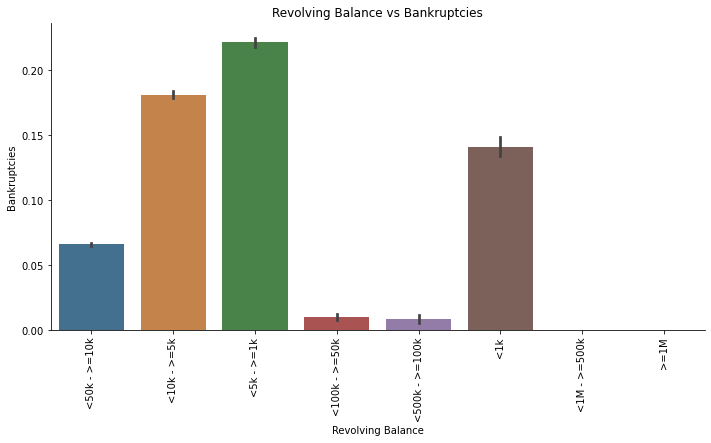

In [58]:
plt.figure(figsize=(15,8))
sns.catplot(x="revobalcat", y="pub_rec_bankruptcies", 
                data=df, saturation=.5,
                kind="bar",aspect=2)

plt.title('Revolving Balance vs Bankruptcies')
plt.xlabel('Revolving Balance')
plt.ylabel('Bankruptcies')
plt.xticks(rotation=90)

### Intrest Rate

(array([0, 1, 2, 3]),
 [Text(0, 0, '<20 - >=10'),
  Text(1, 0, '<10 - >=5'),
  Text(2, 0, '<30 - >=20'),
  Text(3, 0, '>=30')])

<Figure size 1080x576 with 0 Axes>

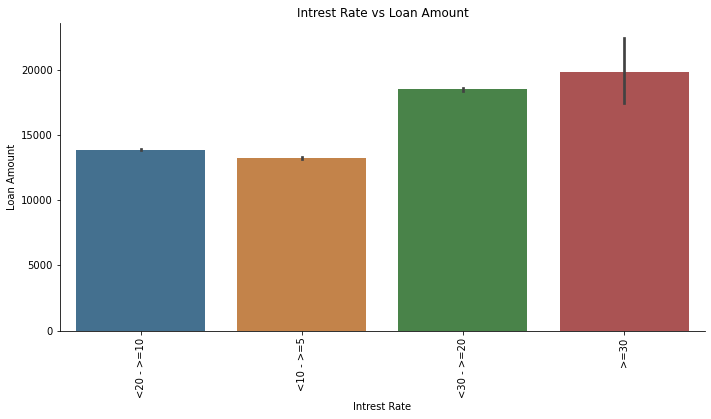

In [59]:
plt.figure(figsize=(15,8))
sns.catplot(x="Intratecat", y="loan_amnt", 
                data=df, saturation=.5,
                kind="bar",aspect=2)

plt.title('Intrest Rate vs Loan Amount')
plt.xlabel('Intrest Rate')
plt.ylabel('Loan Amount')

plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, '<20 - >=10'),
  Text(1, 0, '<10 - >=5'),
  Text(2, 0, '<30 - >=20'),
  Text(3, 0, '>=30')])

<Figure size 1080x576 with 0 Axes>

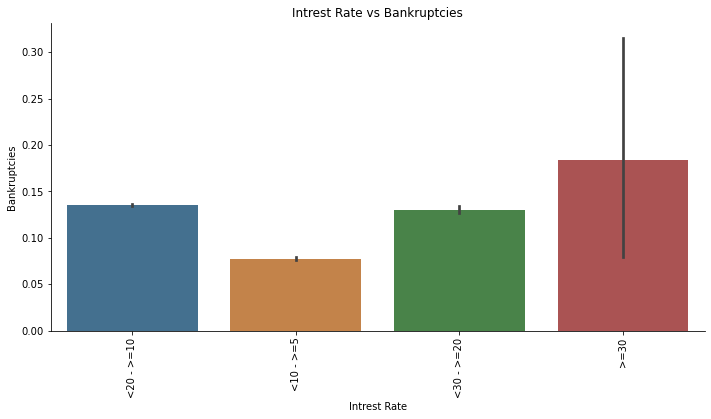

In [60]:
plt.figure(figsize=(15,8))
sns.catplot(x="Intratecat", y="pub_rec_bankruptcies", 
                data=df, saturation=.5,
                kind="bar",aspect=2)

plt.title('Intrest Rate vs Bankruptcies')
plt.xlabel('Intrest Rate')
plt.ylabel('Bankruptcies')
plt.xticks(rotation=90)

### Issue date

In [84]:
##Extracting Year
df['Year']=df['issue_d'].str[4:8]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2014'),
  Text(1, 0, '2015'),
  Text(2, 0, '2013'),
  Text(3, 0, '2012'),
  Text(4, 0, '2016'),
  Text(5, 0, '2011'),
  Text(6, 0, '2010'),
  Text(7, 0, '2009'),
  Text(8, 0, '2008'),
  Text(9, 0, '2007')])

<Figure size 1080x576 with 0 Axes>

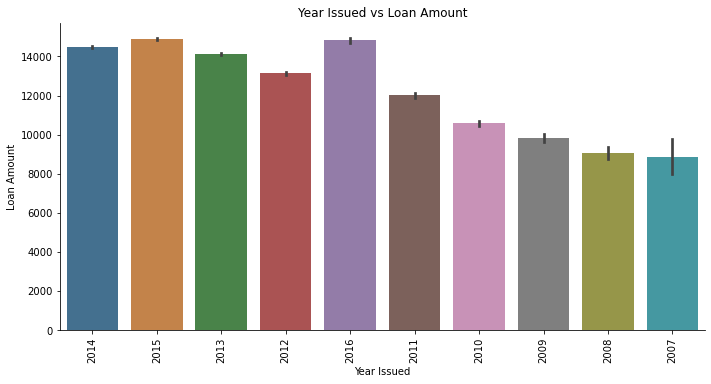

In [62]:
plt.figure(figsize=(15,8))
plot_orderd = df.groupby('Year')['loan_amnt'].sum().sort_values(ascending=False).index.values
sns.catplot(x="Year", y="loan_amnt", 
                data=df, saturation=.5,
                kind="bar",aspect=2, order=plot_orderd)


plt.title('Year Issued vs Loan Amount')
plt.xlabel('Year Issued')
plt.ylabel('Loan Amount')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2014'),
  Text(1, 0, '2015'),
  Text(2, 0, '2013'),
  Text(3, 0, '2016'),
  Text(4, 0, '2012'),
  Text(5, 0, '2011'),
  Text(6, 0, '2010'),
  Text(7, 0, '2009'),
  Text(8, 0, '2008'),
  Text(9, 0, '2007')])

<Figure size 1080x576 with 0 Axes>

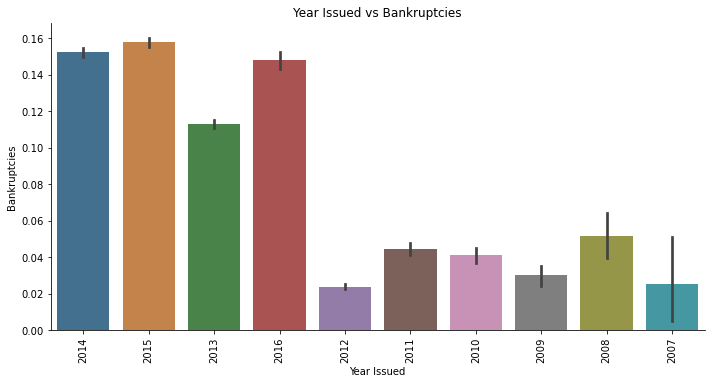

In [63]:
plt.figure(figsize=(15,8))
plot_order = df.groupby('Year')['pub_rec_bankruptcies'].sum().sort_values(ascending=False).index.values

sns.catplot(x="Year", y="pub_rec_bankruptcies", 
                data=df, saturation=.5,
                kind="bar",aspect=2, order=plot_order)

plt.title('Year Issued vs Bankruptcies')
plt.xlabel('Year Issued')
plt.ylabel('Bankruptcies')
plt.xticks(rotation=90)

### Grade

Text(-9.075000000000003, 0.5, 'Loan Amount')

<Figure size 1080x576 with 0 Axes>

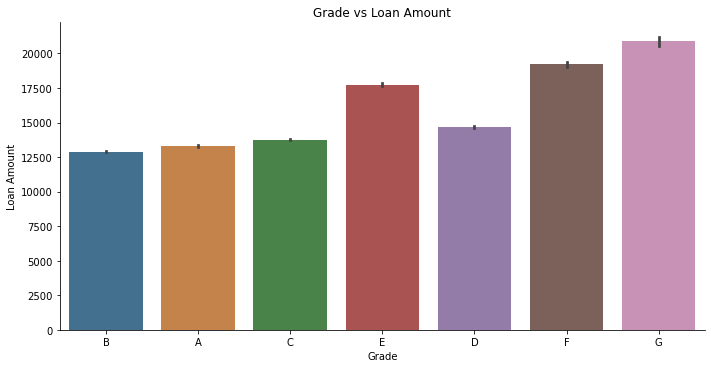

In [64]:
plt.figure(figsize=(15,8))
sns.catplot(x="grade", y="loan_amnt", 
                data=df, saturation=.5,
                kind="bar",aspect=2)

plt.title('Grade vs Loan Amount')
plt.xlabel('Grade')
plt.ylabel('Loan Amount')


Text(0.42499999999999716, 0.5, 'Bankruptcies')

<Figure size 1080x576 with 0 Axes>

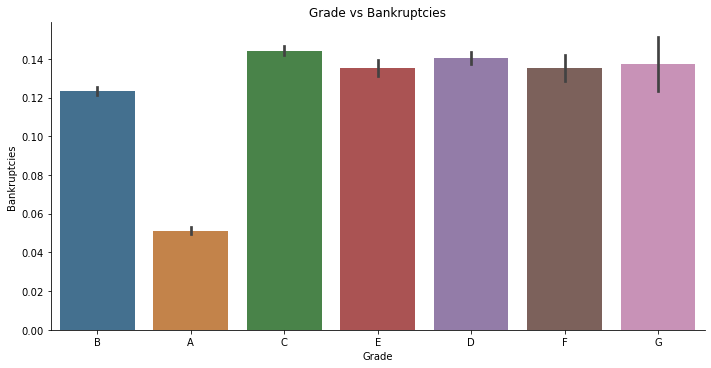

In [65]:
plt.figure(figsize=(15,8))
sns.catplot(x="grade", y="pub_rec_bankruptcies", 
                data=df, saturation=.5,
                kind="bar",aspect=2)

plt.title('Grade vs Bankruptcies')
plt.xlabel('Grade')
plt.ylabel('Bankruptcies')

Text(-9.074999999999996, 0.5, 'Annual Income')

<Figure size 1080x576 with 0 Axes>

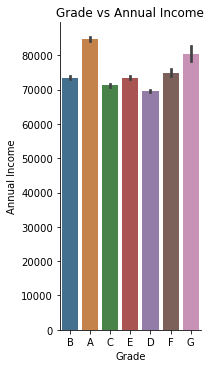

In [86]:
## Inrelation to Annual Income

plt.figure(figsize=(15,8))
sns.catplot(x="grade", y="annual_inc", 
                data=df, saturation=.5,
                kind="bar",aspect=.6)
plt.title('Grade vs Annual Income')
plt.xlabel('Grade')
plt.ylabel('Annual Income')


### Open Accounts

Text(-9.075000000000003, 0.5, 'Loan Amount')

<Figure size 1080x576 with 0 Axes>

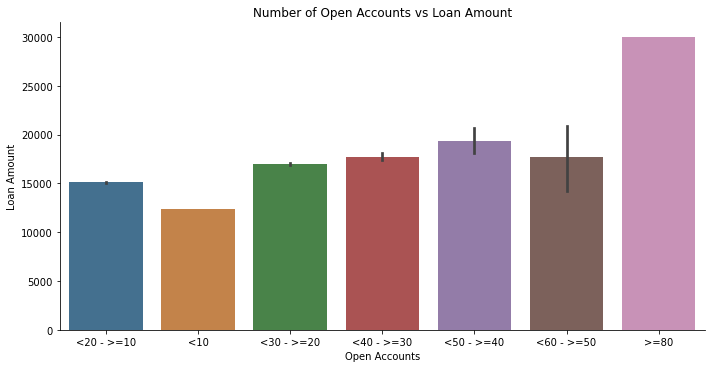

In [67]:
plt.figure(figsize=(15,8))
plot_orders = df.groupby('openacccat')['loan_amnt'].sum().sort_values(ascending=False).index.values
sns.catplot(x="openacccat", y="loan_amnt", 
                data=df, saturation=.5,
                kind="bar",aspect=2, order=plot_orders)

plt.title('Number of Open Accounts vs Loan Amount')
plt.xlabel('Open Accounts')
plt.ylabel('Loan Amount')


Text(0.42499999999999716, 0.5, 'Bankruptcies')

<Figure size 1080x576 with 0 Axes>

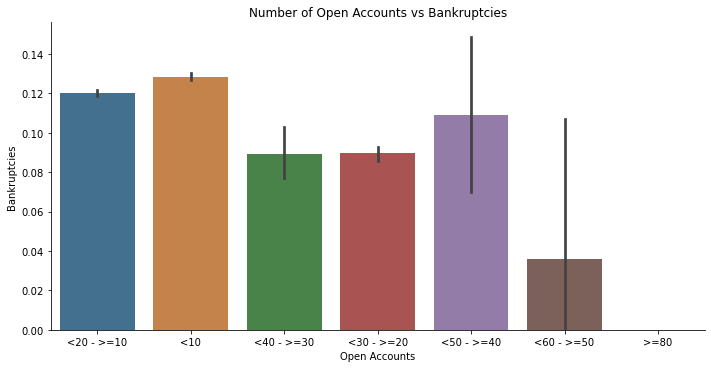

In [68]:
plt.figure(figsize=(15,8))
sns.catplot(x="openacccat", y="pub_rec_bankruptcies", 
                data=df, saturation=.5,
                kind="bar",aspect=2)

plt.title('Number of Open Accounts vs Bankruptcies')
plt.xlabel('Open Accounts')
plt.ylabel('Bankruptcies')


### Mortgage Accounts

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '<5'),
  Text(1, 0, '<10 - >=5'),
  Text(2, 0, '<20 - >=10'),
  Text(3, 0, '<30 - >=20'),
  Text(4, 0, '>=30')])

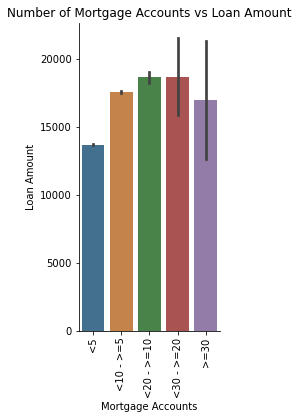

In [69]:
sns.catplot(x="mortacccat", y="loan_amnt", 
                data=df, saturation=.5,
                kind="bar",aspect=.6)

plt.title('Number of Mortgage Accounts vs Loan Amount')
plt.xlabel('Mortgage Accounts')
plt.ylabel('Loan Amount')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '<5'),
  Text(1, 0, '<10 - >=5'),
  Text(2, 0, '<20 - >=10'),
  Text(3, 0, '<30 - >=20'),
  Text(4, 0, '>=30')])

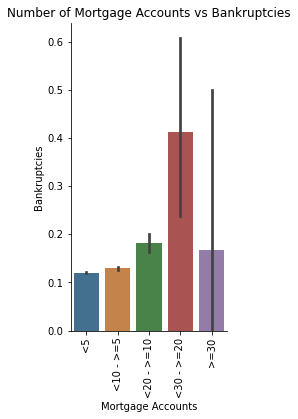

In [70]:
sns.catplot(x="mortacccat", y="pub_rec_bankruptcies", 
                data=df, saturation=.5,
                kind="bar",aspect=.6)

plt.title('Number of Mortgage Accounts vs Bankruptcies')
plt.xlabel('Mortgage Accounts')
plt.ylabel('Bankruptcies')
plt.xticks(rotation=90)

In [ ]:
sns.catplot(x="mortacccat", y="pub_rec_bankruptcies", 
                data=df, saturation=.5,
                kind="bar",aspect=.6)

plt.title('Number of Mortgage Accounts vs Bankruptcies')
plt.xlabel('Mortgage Accounts')
plt.ylabel('Bankruptcies')
plt.xticks(rotation=90)

### DTI

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '<30 - >=20'),
  Text(1, 0, '<20 - >=10'),
  Text(2, 0, '<5'),
  Text(3, 0, '<40 - >=30'),
  Text(4, 0, '<10 - >=5'),
  Text(5, 0, '<50 - >=40'),
  Text(6, 0, '>=50')])

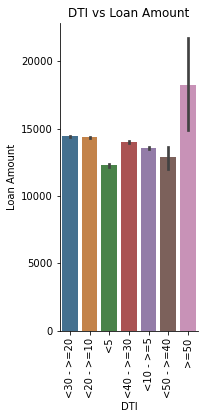

In [79]:
sns.catplot(x="dticat", y="loan_amnt", 
                data=df, saturation=.5,
                kind="bar",aspect=.6)

plt.title('DTI vs Loan Amount')
plt.xlabel('DTI')
plt.ylabel('Loan Amount')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '<30 - >=20'),
  Text(1, 0, '<20 - >=10'),
  Text(2, 0, '<5'),
  Text(3, 0, '<40 - >=30'),
  Text(4, 0, '<10 - >=5'),
  Text(5, 0, '<50 - >=40'),
  Text(6, 0, '>=50')])

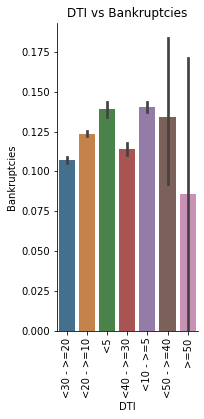

In [80]:
sns.catplot(x="dticat", y="pub_rec_bankruptcies", 
                data=df, saturation=.5,
                kind="bar",aspect=.6)

plt.title('DTI vs Bankruptcies')
plt.xlabel('DTI')
plt.ylabel('Bankruptcies')
plt.xticks(rotation=90)

In [83]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,Loanamtcat,Intratecat,Anincomecat,openacccat,revobalcat,Revolvutilcat,Totalacccat,mortacccat,pubrecbankruptccat,Year,dticat
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",<20k - >=10k,<20 - >=10,<500k - >=100k,<20 - >=10,<50k - >=10k,<50,<30 - >=20,<5,<2,2015,<30 - >=20
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",<10k - >=5k,<20 - >=10,<100k - >=50k,<20 - >=10,<50k - >=10k,<100 - >=50,<30 - >=20,<5,<2,2015,<30 - >=20
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",<20k - >=10k,<20 - >=10,<50k - >=10k,<20 - >=10,<50k - >=10k,<100 - >=50,<30 - >=20,<5,<2,2015,<20 - >=10
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",<10k - >=5k,<10 - >=5,<100k - >=50k,<10,<10k - >=5k,<50,<20 - >=10,<5,<2,2014,<5
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",<30k - >=20k,<20 - >=10,<100k - >=50k,<20 - >=10,<50k - >=10k,<100 - >=50,<50 - >=40,<5,<2,2013,<40 - >=30


# Summary

-Employment Length, Verification, and Application Type did not affect loan repayment. 

-Purpose, Annual Income, Home Ownership, Number of Mortgage Accounts, Term Length, 
Issue Year, Grade, Number of Accounts Open, Interest Rate, , DTI Revolving Balance affected loan repayment


Suggestions:

1. Purpose- Avoid clients that request for home improvement, medical, renewable energy, vacation, and debt. 
2. Annual Income- Avoid clients who request loans with annual income of  <50k- >=5k.
3. Home Ownership- Avoid clients who request loans to Rent lodging.
4. Mortgage Accounts- Avoid clients who had  <30->=20 mortgage accounts
5. Term Length – Give out more 60 month loans
6. Issue Year- Not changeable. 
7. Grade- Offer more to clients of Grade A status and less to C-G. 
8. Open Accounts- Monitor more on accounts <10-<20 and <50-40 accounts. 
9. Interest Rate- Lower interest rate. 
10. Revolving Balance- Avoid people with range of <1k-<10k range revolving balance.  
11. DTI- market to people with DTI >=50% and avoid people with DTI of <5-<10. 
